## Machine Learning with Python (Classifier Model with SVM)

* ### Required Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(42)

from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

## Data Preprocessing

* ### Importing Dataset

In [2]:
#Training Dataset
dataset_train = pd.read_csv('dataset/optdigits.tra', header=None)

dataset_feautes = dataset_train.iloc[:,:-1].values
dataset_labels = dataset_train.iloc[:,-1].values

In [3]:
dataset_train.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [4]:
#Test Dataset
dataset_test = pd.read_csv('dataset/optdigits.tes', header=None)

dataset_feautes_test = dataset_test.iloc[:,:-1].values
dataset_labels_test = dataset_test.iloc[:,-1].values

In [5]:
dataset_test

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1793,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1794,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1795,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [6]:
dataset_feautes.shape

(3823, 64)

Text(0.5, 1.0, 'Digit 2')

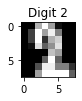

In [7]:
# Plotting some samples matrix form

two = dataset_feautes[5,:].reshape(8,8)

plt.figure(figsize=(1, 1))
plt.imshow(two, cmap='gray')
plt.title("Digit 2")

Text(0.5, 1.0, 'Digit 3')

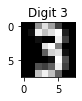

In [8]:
# Plotting some samples matrix form

three = dataset_feautes[3000,:].reshape(8,8)

plt.figure(figsize=(1, 1))
plt.imshow(three, cmap='gray')
plt.title("Digit 3")

* ### Splitting the Training Set into Training & Validation Set

In [9]:
X_train, X_val, y_train, y_val = train_test_split(dataset_feautes, dataset_labels, 
                                                  test_size = 0.2,
                                                  random_state = 42)

In [10]:
print(X_train.shape, X_val.shape)

(3058, 64) (765, 64)


In [11]:
X_test = dataset_feautes_test.reshape(1797, 64)

In [12]:
X_test.shape

(1797, 64)

* ### Normalization

In [13]:
X_train[1]

array([ 0,  1, 10, 13, 10,  1,  0,  0,  0,  6, 14,  4, 10, 15,  2,  0,  0,
        8, 12,  0,  2, 16,  3,  0,  0,  2, 14,  8, 10, 16,  4,  0,  0,  0,
        2,  4,  4, 13,  6,  0,  0,  0,  0,  0,  0, 12,  8,  0,  0,  6, 12,
        2,  6, 16,  4,  0,  0,  1, 10, 16, 13,  5,  0,  0], dtype=int64)

In [14]:
print((min(X_train[1]), max(X_train[1])))

(0, 16)


In [15]:
X_train

array([[ 0,  0, 13, ...,  0,  0,  0],
       [ 0,  1, 10, ...,  5,  0,  0],
       [ 0,  0,  3, ..., 14, 10,  0],
       ...,
       [ 0,  0, 10, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  7,  0,  0],
       [ 0,  0,  7, ..., 12,  2,  0]], dtype=int64)

In [16]:
# Feature Normalization 
X_train = X_train.astype('float32') 
X_val= X_val.astype('float32') 
X_test = X_test.astype('float32')

X_train /= 16 
X_val   /= 16 
X_test  /= 16

In [17]:
X_train

array([[0.    , 0.    , 0.8125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.0625, 0.625 , ..., 0.3125, 0.    , 0.    ],
       [0.    , 0.    , 0.1875, ..., 0.875 , 0.625 , 0.    ],
       ...,
       [0.    , 0.    , 0.625 , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.4375, 0.    , 0.    ],
       [0.    , 0.    , 0.4375, ..., 0.75  , 0.125 , 0.    ]],
      dtype=float32)

In [18]:
X_val

array([[0.    , 0.    , 0.4375, ..., 0.9375, 0.1875, 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.25  , 0.    ],
       [0.    , 0.0625, 0.5   , ..., 0.25  , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.375 , 0.    , 0.    ]],
      dtype=float32)

In [19]:
X_test

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]],
      dtype=float32)

## Model Training

In [32]:
classifier = svm.SVC(C=100, kernel='rbf', random_state=42)
classifier.fit(X_train, y_train)

SVC(C=100, random_state=42)

In [33]:
predictions_val = classifier.predict(X_val)

In [34]:
predictions_val

array([6, 1, 3, 5, 3, 7, 9, 1, 3, 4, 1, 6, 7, 1, 8, 1, 1, 7, 6, 9, 0, 7,
       2, 2, 7, 3, 3, 0, 3, 5, 3, 3, 4, 1, 1, 9, 6, 3, 6, 9, 1, 8, 7, 1,
       5, 7, 7, 0, 3, 4, 8, 5, 7, 9, 9, 1, 4, 9, 2, 5, 3, 4, 3, 9, 3, 9,
       5, 2, 8, 1, 9, 8, 0, 1, 9, 1, 3, 7, 5, 1, 7, 0, 5, 8, 3, 8, 1, 1,
       3, 1, 4, 1, 9, 9, 8, 4, 9, 5, 4, 2, 3, 0, 5, 0, 3, 7, 5, 7, 1, 0,
       1, 5, 6, 9, 5, 7, 7, 2, 0, 9, 2, 4, 3, 1, 0, 9, 7, 3, 3, 4, 9, 2,
       2, 0, 4, 5, 7, 2, 5, 0, 5, 2, 8, 0, 7, 7, 6, 0, 2, 8, 1, 2, 3, 2,
       5, 7, 7, 7, 5, 0, 6, 8, 4, 7, 5, 1, 7, 3, 8, 6, 0, 7, 4, 2, 3, 7,
       7, 2, 7, 5, 5, 6, 9, 6, 9, 3, 0, 6, 4, 9, 4, 1, 4, 0, 3, 7, 3, 1,
       4, 9, 4, 7, 3, 4, 9, 5, 2, 3, 6, 7, 0, 0, 9, 2, 7, 8, 3, 0, 4, 9,
       2, 9, 7, 0, 7, 7, 5, 7, 6, 3, 4, 2, 8, 0, 3, 6, 2, 7, 3, 6, 9, 1,
       9, 5, 9, 1, 6, 6, 3, 4, 7, 0, 8, 3, 7, 5, 6, 6, 9, 3, 6, 5, 4, 9,
       4, 7, 3, 1, 2, 6, 0, 2, 3, 4, 4, 2, 1, 8, 2, 7, 5, 2, 6, 5, 9, 4,
       2, 8, 3, 9, 0, 9, 7, 2, 7, 7, 5, 0, 5, 1, 0,

In [35]:
print("Accuracy Score:",metrics.accuracy_score(y_val, predictions_val))

Accuracy Score: 0.9934640522875817


## Evaluation of the Classifier Success with Cross-Validation

In [36]:
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished


In [37]:
#Cross Validation Scores
accuracies

array([0.98039216, 1.        , 0.9869281 , 0.99346405, 0.98039216,
       0.98039216, 0.99346405, 0.98039216, 1.        , 0.99672131])

In [38]:
print("KfoldCrossVal score using SVM is %s" %accuracies.mean())

KfoldCrossVal score using SVM is 0.9892146148076717


## Evaluating of the Model on the Test Set

In [39]:
y_pred = classifier.predict(X_test)

In [40]:
y_pred

array([0, 1, 2, ..., 8, 9, 8], dtype=int64)

In [41]:
y_pred.shape

(1797,)

In [42]:
print("Accuracy Score with Test Set:",metrics.accuracy_score(dataset_labels_test, y_pred))

Accuracy Score with Test Set: 0.9788536449638287


* ### Classification Report

In [43]:
print(classification_report(dataset_labels_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       178
           1       0.96      0.98      0.97       182
           2       1.00      0.99      0.99       177
           3       0.98      0.98      0.98       183
           4       1.00      1.00      1.00       181
           5       0.95      0.99      0.97       182
           6       0.99      0.99      0.99       181
           7       0.99      0.93      0.96       179
           8       0.98      0.94      0.96       174
           9       0.95      0.97      0.96       180

    accuracy                           0.98      1797
   macro avg       0.98      0.98      0.98      1797
weighted avg       0.98      0.98      0.98      1797



## Confusion Matrix

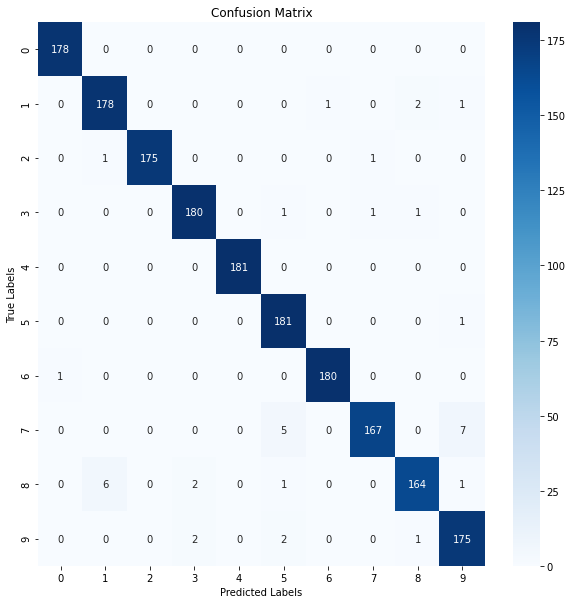

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Creating the confusion matrix
conf_matrix = confusion_matrix(dataset_labels_test, y_pred)
f, ax = plt.subplots(figsize = (10,10))

sns.heatmap(conf_matrix, annot=True, fmt='.0f', ax = ax, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show();

## Classification of a New Sample whose Class is Unknown

In [45]:
def classification_model_svm(features):
    df = pd.DataFrame(data=features)
    df = df.iloc[:,:].values.reshape(1,df.shape[0])
    
    #Normalization
    df = df.astype('float32')
    df /= 16
    
    return print('Predicted Value : ', classifier.predict(df))

Let be the properties entered by the user are as follows.

In [46]:
new_sample_feature_values = np.array([0,0,2,15,15,3,0,0,0,0,8,14,16,11,0,0,0,0,0,0,11,14,0,0,0,0,0,0,11,14,3,0,0,0,4,12,16,16,7,0,0,0,11,16,12,1,0,0,0,0,1,14,6,0,0,0,0,0,4,12,1,0,0,0])

In [47]:
classification_model_svm(new_sample_feature_values)

Predicted Value :  [7]


Text(0.5, 1.0, 'Digit')

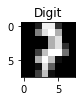

In [48]:
# Plotting entering sample matrix form

digit = new_sample_feature_values.reshape(8,8)

plt.figure(figsize=(1, 1))
plt.imshow(digit, cmap='gray')
plt.title("Digit")